# Agregados. (Verticalización y Normalización)

In [ ]:
import os
import pandas as pd

In [ ]:
os.chdir(r"/content/sample_data")
SalePrice=pd.read_csv("SalePrice.csv")

# Detección de columnas categóricas.

Puedo ver cuantas variables categóricas tengo.

Podemos aplicar cualquier función columna por columna usando `apply`.

En este caso deseamos que nos devuelva el número de valores únicos de cada columna x. Usando una función anónima

In [ ]:
val_unicos = SalePrice.apply(lambda x: len(x.unique()))
val_unicos

,0
Id,1459
MSSubClass,16
MSZoning,6
LotFrontage,116
LotArea,1106
...,...
MiscVal,26
MoSold,12
YrSold,5
SaleType,10


In [ ]:
SalePrice.shape

(1459, 80)

Aunque ya existe una función específica en pandas para esto

In [ ]:
val_unicos = SalePrice.nunique()
val_unicos

,0
Id,1459
MSSubClass,16
MSZoning,5
LotFrontage,115
LotArea,1106
...,...
MiscVal,26
MoSold,12
YrSold,5
SaleType,9


Sin embargo, existe una diferencia. El primer método incluye `nan` como una de las categorías posibles.

Puesto que el resultado es una serie, puedo filtrar los valores. Si el número de valores únicos es inferior, digamos, a 10, considero que esa columna es categórica.

In [ ]:
val_unicos[val_unicos < 10]

,0
MSZoning,5
Street,2
Alley,2
LotShape,4
LandContour,4
Utilities,1
LotConfig,5
LandSlope,3
Condition1,9
Condition2,5


Ahora puedo ver cómo están distribuidos esos valores únicos.

<Axes: xlabel='MSZoning'>

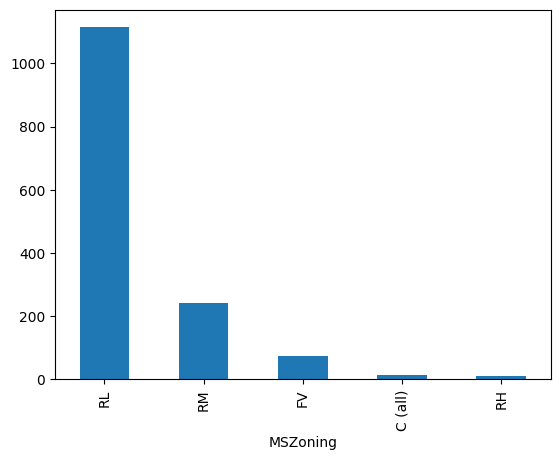

In [ ]:
# SalePrice["MSZoning"].unique()
SalePrice["MSZoning"].value_counts().plot(kind = "bar")

<Axes: xlabel='BldgType'>

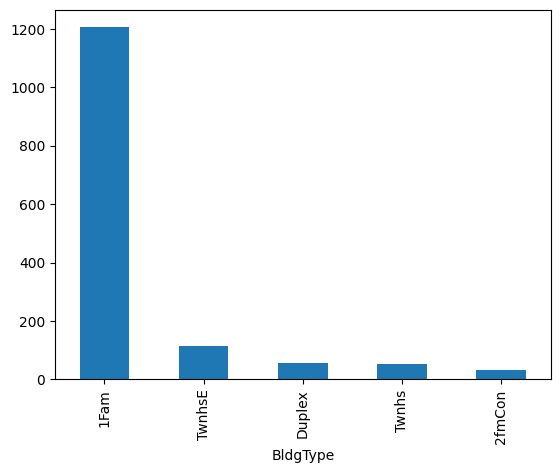

In [ ]:
SalePrice["BldgType"].value_counts().plot(kind = "bar")

# Agregaciones

In [ ]:
ZonaConteo = SalePrice.groupby(['MSZoning','BldgType']).agg(len).reset_index()
ZonaConteo

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),1Fam,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,C (all),2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,FV,1Fam,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
3,FV,Twnhs,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,FV,TwnhsE,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
5,RH,1Fam,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,RH,2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,RH,Duplex,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,RH,TwnhsE,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,RL,1Fam,984,984,984,984,984,984,984,984,...,984,984,984,984,984,984,984,984,984,984


Tambien podemos realizar el sumatorio.

Si incluimos todas las variables, las de tipo String darán resultados no deseados.

Si en lugar de `sum` hubiéramos usado `mean`, el cálculo sería imposible.

In [ ]:
ZonaSuma = SalePrice.groupby(['MSZoning','BldgType']).agg("sum").reset_index()
ZonaSuma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),1Fam,29117,560,687.0,95755,PaveGrvlPavePavePavePavePaveGrvlPavePavePavePa...,Grvl,IR1RegRegRegRegRegRegRegRegRegRegRegReg,LvlLvlLvlLvlLvlLvlLvlBnkLvlLvlLvlLvlBnk,...,0,0,0,0,0,0,90,26103,WDWDWDWDWDWDWDWDWDWDConLDWDWD,AbnormlAllocaNormalAbnormlNormalNormalNormalNo...
1,C (all),2fmCon,5473,380,125.0,17250,PavePave,0,RegReg,LvlLvl,...,0,0,0,0,0,0,16,4013,WDWD,NormalAbnorml
2,FV,1Fam,79975,1500,2811.0,359197,PavePavePavePavePavePavePavePavePavePavePavePa...,PavePavePavePavePavePave,RegRegIR1IR1RegRegRegRegIR1RegIR1RegRegRegRegI...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,...,650,0,0,GdPrv,0,0,261,78311,NewWDNewWDWDWDWDWDNewWDWDWDWDNewWDWDWDNewWDNew...,PartialNormalPartialNormalNormalNormalNormalNo...
3,FV,Twnhs,20329,1600,248.0,24639,PavePavePavePavePavePavePavePavePavePave,PavePavePavePavePavePavePavePavePave,RegRegRegRegRegRegRegRegRegReg,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvl,...,0,0,0,0,0,0,73,20081,WDWDWDWDWDWDConLDWDWDWD,NormalNormalNormalNormalNormalNormalNormalNorm...
4,FV,TwnhsE,50684,3440,634.0,94999,PavePavePavePavePavePavePavePavePavePavePavePa...,PavePavePavePavePavePavePavePavePavePavePavePa...,IR1RegRegRegIR1IR1IR1RegRegIR1RegRegIR1IR1IR1I...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlL...,...,94,0,0,0,0,0,129,50203,WDWDConLDWDWDNewWDWDWDWDWDWDWDWDWDWDWDWDNewNew...,NormalNormalNormalNormalNormalPartialNormalNor...
5,RH,1Fam,4850,100,220.0,27722,PavePavePave,Pave,RegRegReg,LvlLvlLvl,...,120,0,0,MnPrv,0,0,17,6029,WDWDWD,NormalNormalAbnorml
6,RH,2fmCon,4435,380,118.0,12478,PavePave,0,RegReg,LvlBnk,...,0,0,0,0,0,0,13,4016,CODWD,NormalAbnorml
7,RH,Duplex,1594,90,60.0,7200,Pave,Pave,Reg,Lvl,...,0,0,0,0,Shed,500,2,2010,WD,Normal
8,RH,TwnhsE,8676,480,111.0,29687,PavePavePavePave,0,IR1IR1IR2IR2,LvlLvlLvlLvl,...,0,0,0,0,0,0,32,8030,WDWDWDWD,NormalNormalNormalNormal
9,RL,1Fam,2165928,39620,60840.0,11000097,PavePavePavePavePavePavePavePavePavePavePavePa...,PaveGrvlGrvlGrvlGrvlGrvlGrvlGrvlPaveGrvlGrvlGr...,IR1IR1IR1IR1IR1IR1RegRegIR1IR1RegIR1RegRegIR1I...,LvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlLvlHLSLvlLvlL...,...,19993,2545,ExExGd,MnPrvGdPrvMnPrvGdPrvGdWoGdPrvGdWoMnPrvGdPrvGdW...,Gar2ShedShedShedShedShedShedShedShedShedShedSh...,75495,5994,1975601,WDWDWDWDWDWDWDWDNewNewWDWDWDWDWDWDWDWDWDWDWDWD...,NormalNormalNormalNormalNormalNormalNormalNorm...


Solo incluye variables numericas.

In [ ]:
SalePrice_num = SalePrice.select_dtypes(["number", "bool"])
# Necesito recuperar la columna categórica con la que hago el agregado
SalePrice_num["MSZoning"] = SalePrice["MSZoning"]
SalePrice_num["BldgType"] = SalePrice["BldgType"]

In [ ]:
ZonaSuma = SalePrice_num.groupby(['MSZoning', 'BldgType']).agg("sum").reset_index()
ZonaSuma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


In [ ]:
SalePrice_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'BldgType'],
      dtype='object')

Puedo asignar una función de agregación distinta a cada columna de datos.

In [ ]:
dict_calculos = {'YearBuilt': 'mean',
                 'OverallQual': 'mean',
                 'LotArea': 'sum'}
ZonaSuma = SalePrice_num.groupby(['MSZoning', 'BldgType']).agg(dict_calculos).reset_index()
ZonaSuma

,MSZoning,BldgType,YearBuilt,OverallQual,LotArea
0,C (all),1Fam,1917.615385,3.769231,95755
1,C (all),2fmCon,1923.000000,5.000000,17250
2,FV,1Fam,2004.641026,7.435897,359197
3,FV,Twnhs,2001.300000,6.800000,24639
4,FV,TwnhsE,2003.200000,7.360000,94999
5,RH,1Fam,1939.666667,5.000000,27722
6,RH,2fmCon,1927.500000,5.500000,12478
7,RH,Duplex,1967.000000,4.000000,7200
8,RH,TwnhsE,1999.750000,6.250000,29687
9,RL,1Fam,1976.138211,6.198171,11000097


Vamos a definir una función personalizada que en lugar de sumar los valores suma el módulo de los valores

In [ ]:
serie = pd.Series([0, 1, -2, 3])
serie.abs().sum()

6

In [ ]:
def suma_mod(serie):
    # serie = serie.metodo()
    return serie.abs().sum()

In [ ]:
ZonaSuma = SalePrice_num.groupby(['MSZoning','BldgType']).agg(suma_mod).reset_index()
ZonaSuma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


In [ ]:
ZonaSuma = SalePrice_num.groupby(['MSZoning','BldgType']).agg(lambda x: x.abs().sum()).reset_index()
ZonaSuma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


Tambien se pueden realizar agregaciones por mas de una variable.

Primero necesito un DataFrame con las combinaciones de ambas variables categóricas existentes en los datos:

In [ ]:
SP1 = SalePrice.loc[:, ['MSZoning',"BldgType"]].drop_duplicates()
SP1

,MSZoning,BldgType
0,RH,1Fam
1,RL,1Fam
4,RL,TwnhsE
10,RH,TwnhsE
11,RM,Twnhs
13,RL,Twnhs
28,FV,1Fam
35,FV,TwnhsE
38,FV,Twnhs
53,RL,Duplex


<Axes: xlabel='MSZoning,BldgType'>

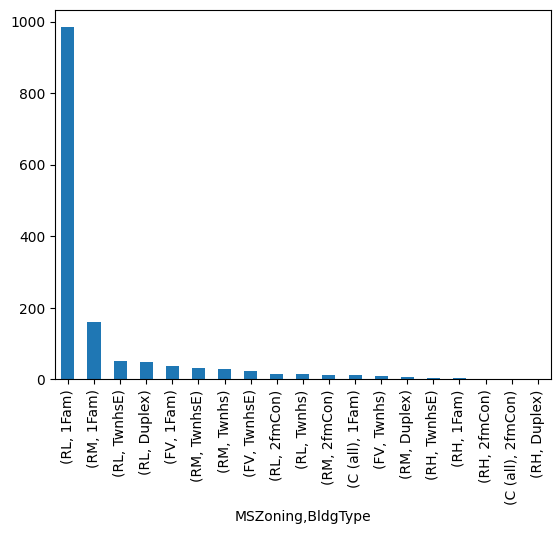

In [ ]:
SalePrice[["MSZoning", "BldgType"]].value_counts().plot(kind = "bar")

In [ ]:
zona_tipo = SalePrice.groupby(['MSZoning',"BldgType"]).agg(len).reset_index()
zona_tipo

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,C (all),1Fam,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
1,C (all),2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,FV,1Fam,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
3,FV,Twnhs,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
4,FV,TwnhsE,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
5,RH,1Fam,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,RH,2fmCon,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
7,RH,Duplex,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,RH,TwnhsE,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,RL,1Fam,984,984,984,984,984,984,984,984,...,984,984,984,984,984,984,984,984,984,984


Y sumar


In [ ]:
SalePrice_num["BldgType"] = SalePrice["BldgType"]

In [ ]:
zona_tipo_suma = SalePrice_num.groupby(['MSZoning',"BldgType"]).agg("sum").reset_index()
zona_tipo_suma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


# Verticalización

Verticalizar un DataFrame en pandas generalmente se refiere a transformar datos de un formato de tabla a lo ancho (horizontal) a un formato a lo largo (vertical).

Se suele realizar convirtiendo varias columnas en valores categóricos en una nueva columna. Los datos que se guardaran en esas columnas eliminadas se incorporarán de arriba a abajo en la segunda nueva columna creada.

Esto se puede lograr utilizando las funciones `melt` y `stack` de pandas.

## `melt`

In [ ]:
import pandas as pd

# Crear DataFrame de ejemplo
datos = pd.DataFrame({
    'DNI': ["14543234L", "23445853Z", "17754679L"],
    'Matemáticas': [9.0, 8.0, 8.5],
    'Física': [7.0, 8.5, 9.1],
    'Química': [6.0, 5.5, 7.3]
})

datos

,DNI,Matemáticas,Física,Química
0,14543234L,9.0,7.0,6.0
1,23445853Z,8.0,8.5,5.5
2,17754679L,8.5,9.1,7.3


Ahora la columna DNI ya no es de valores únicos. Sí lo será la combinación DNI - Asignatura

Puesto que se crean dos columnas, debemos dar dos nombres nuevos de columna, una para las variables que van a desaparecer y otra para los valores que vamos a concatenar verticalmente. (Si no las llamará `variable` y `value` automáticamente)

In [ ]:
datos_vert = pd.melt(datos, id_vars=['DNI'], var_name='Asignatura', value_name='Notas')
datos_vert

,DNI,Asignatura,Notas
0,14543234L,Matemáticas,9.0
1,23445853Z,Matemáticas,8.0
2,17754679L,Matemáticas,8.5
3,14543234L,Física,7.0
4,23445853Z,Física,8.5
5,17754679L,Física,9.1
6,14543234L,Química,6.0
7,23445853Z,Química,5.5
8,17754679L,Química,7.3


In [ ]:
datos_vert.groupby("Asignatura").agg({"Notas": "mean"})

,Notas
Asignatura,
Física,8.200000
Matemáticas,8.500000
Química,6.266667


In [ ]:
datos_vert.groupby("DNI").agg({"Notas": "mean"})

,Notas
DNI,
14543234L,7.333333
17754679L,8.300000
23445853Z,7.333333


## `stack`

Si no tenemos una columna de identificadores y queremos usar el índice podemos usar `stack`.

In [ ]:
import pandas as pd

# Crear DataFrame de ejemplo
datos = pd.DataFrame({
    'Matemáticas': [9.0, 8.0, 8.5],
    'Física': [7.0, 8.5, 9.1],
    'Química': [6.0, 5.5, 7.3]
})

datos

,Matemáticas,Física,Química
0,9.0,7.0,6.0
1,8.0,8.5,5.5
2,8.5,9.1,7.3


Obtenemos un objeto de tipo `Series` con doble índice. Las columnas se convertirán en el índice interno.

In [ ]:
# Verticalizar el DataFrame usando stack
datos_stacked = datos.stack()
print(type(datos_stacked))
datos_stacked

<class 'pandas.core.series.Series'>


0  Matemáticas    9.0
   Física         7.0
   Química        6.0
1  Matemáticas    8.0
   Física         8.5
   Química        5.5
2  Matemáticas    8.5
   Física         9.1
   Química        7.3
dtype: float64

Con `reset_index` el índice doble se promocionara a columnas para que sean los nuevos indicadores únicos de la tabla.

In [ ]:
# Verticalizar el DataFrame usando stack
datos_stacked = datos.stack().reset_index()
datos_stacked.columns = ['id', 'Asignatura', 'Nota']
datos_stacked

,id,Asignatura,Nota
0,0,Matemáticas,9.0
1,0,Física,7.0
2,0,Química,6.0
3,1,Matemáticas,8.0
4,1,Física,8.5
5,1,Química,5.5
6,2,Matemáticas,8.5
7,2,Física,9.1
8,2,Química,7.3


## `pivot`

Realiza el paso contrario de `melt` y `stack`

In [ ]:
Normal = datos_stacked.pivot(index='id', columns='Asignatura', values='Nota')
# Normal = datos_stacked.pivot(index='id', columns='Asignatura')['Nota']

print(Normal.columns, Normal.index)

Normal.columns.name = None
Normal.index.name = None

Normal

Index(['Física', 'Matemáticas', 'Química'], dtype='object', name='Asignatura') Index([0, 1, 2], dtype='int64', name='id')


,Física,Matemáticas,Química
0,7.0,9.0,6.0
1,8.5,8.0,5.5
2,9.1,8.5,7.3


In [ ]:
Normal["Física"]

,Física
0,7.0
1,8.5
2,9.1


In [ ]:
Normal.iloc[2,:]

,2
Física,9.1
Matemáticas,8.5
Química,7.3


In [ ]:
ZonaSuma

,MSZoning,BldgType,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,C (all),1Fam,29117,560,687.0,95755,49,68,24929,25487,...,2062.0,154,666,1000,86,0,0,0,90,26103
1,C (all),2fmCon,5473,380,125.0,17250,10,12,3846,3957,...,0.0,0,0,133,0,0,0,0,16,4013
2,FV,1Fam,79975,1500,2811.0,359197,290,195,78181,78197,...,24771.0,3504,4991,36,224,650,0,0,261,78311
3,FV,Twnhs,20329,1600,248.0,24639,68,50,20013,20017,...,4886.0,358,745,0,0,0,0,0,73,20081
4,FV,TwnhsE,50684,3440,634.0,94999,184,125,50080,50088,...,13149.0,1114,2498,0,0,94,0,0,129,50203
5,RH,1Fam,4850,100,220.0,27722,15,15,5819,5861,...,1409.0,261,0,135,0,120,0,0,17,6029
6,RH,2fmCon,4435,380,118.0,12478,11,13,3855,3900,...,890.0,56,144,0,0,0,0,0,13,4016
7,RH,Duplex,1594,90,60.0,7200,4,6,1967,1967,...,0.0,0,0,0,0,0,0,500,2,2010
8,RH,TwnhsE,8676,480,111.0,29687,25,20,7999,8000,...,2087.0,535,272,0,0,0,0,0,32,8030
9,RL,1Fam,2165928,39620,60840.0,11000097,6099,5467,1944520,1953399,...,495554.0,107241,49142,20411,1556,19993,2545,75495,5994,1975601


In [ ]:
Normal2 = ZonaSuma.pivot(index='MSZoning', columns='BldgType', values='LotArea')
Normal2

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),95755.0,17250.0,NaN,NaN,NaN
FV,359197.0,NaN,NaN,24639.0,94999.0
RH,27722.0,12478.0,7200.0,NaN,29687.0
RL,11000097.0,174779.0,454953.0,40145.0,309722.0
RM,1228047.0,110301.0,54296.0,51320.0,109355.0


# Verticalización por varias variables

In [ ]:
# Crear DataFrame de ejemplo
data = {
    'tienda': ['Tienda A', 'Tienda B', 'Tienda C'],
    'producto': ['Producto 1', 'Producto 2', 'Producto 3'],
    'ventas_ene': [150, 200, 250],
    'ventas_feb': [160, 210, 260],
    'ventas_mar': [170, 220, 270]
}
df = pd.DataFrame(data)
df

,tienda,producto,ventas_ene,ventas_feb,ventas_mar
0,Tienda A,Producto 1,150,160,170
1,Tienda B,Producto 2,200,210,220
2,Tienda C,Producto 3,250,260,270


## `melt`

In [ ]:
df_vert = pd.melt(df, id_vars=['tienda', 'producto'], var_name='mes', value_name='ventas')
df_vert

,tienda,producto,mes,ventas
0,Tienda A,Producto 1,ventas_ene,150
1,Tienda B,Producto 2,ventas_ene,200
2,Tienda C,Producto 3,ventas_ene,250
3,Tienda A,Producto 1,ventas_feb,160
4,Tienda B,Producto 2,ventas_feb,210
5,Tienda C,Producto 3,ventas_feb,260
6,Tienda A,Producto 1,ventas_mar,170
7,Tienda B,Producto 2,ventas_mar,220
8,Tienda C,Producto 3,ventas_mar,270


In [ ]:
df_vert["mes"] = df_vert["mes"].str.replace("ventas_", "")
df_vert

,tienda,producto,mes,ventas
0,Tienda A,Producto 1,ene,150
1,Tienda B,Producto 2,ene,200
2,Tienda C,Producto 3,ene,250
3,Tienda A,Producto 1,feb,160
4,Tienda B,Producto 2,feb,210
5,Tienda C,Producto 3,feb,260
6,Tienda A,Producto 1,mar,170
7,Tienda B,Producto 2,mar,220
8,Tienda C,Producto 3,mar,270


## `pivot`

In [ ]:
# Convertir el DataFrame de formato largo a formato ancho
df_wide = df_vert.pivot(index=['tienda', 'producto'], columns='mes', values='ventas').reset_index()
df_wide.columns.name = None  # Quitar el nombre de las columnas

df_wide

,tienda,producto,ene,feb,mar
0,Tienda A,Producto 1,150,160,170
1,Tienda B,Producto 2,200,210,220
2,Tienda C,Producto 3,250,260,270


In [ ]:
SalePrice.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Ejercicio con SalePrice

Construye un Dataframe agregando los datos de SalePrice utilizando dos variables categóricas.

(Por ejemplo LotShape y LandContour)

In [ ]:
SP = SalePrice[["LotShape", "LandContour", "YearRemodAdd", "YearBuilt", "LotArea", "OpenPorchSF"]]

In [ ]:
SP.head()

,LotShape,LandContour,YearRemodAdd,YearBuilt,LotArea,OpenPorchSF
0,Reg,Lvl,1961,1961,11622,0
1,IR1,Lvl,1958,1958,14267,36
2,IR1,Lvl,1998,1997,13830,34
3,IR1,Lvl,1998,1998,9978,36
4,IR1,HLS,1992,1992,5005,82




En el agregado deben aparecer la media del año de remodelación `YearRemodAdd` y el año de construcción `YearBuilt` y la suma del Área del lote `LotArea` y el área del porche abierto `OpenPorchSF`.

(Intenta que el año de construcción medio aparezca como un número entero con una función personalizada)


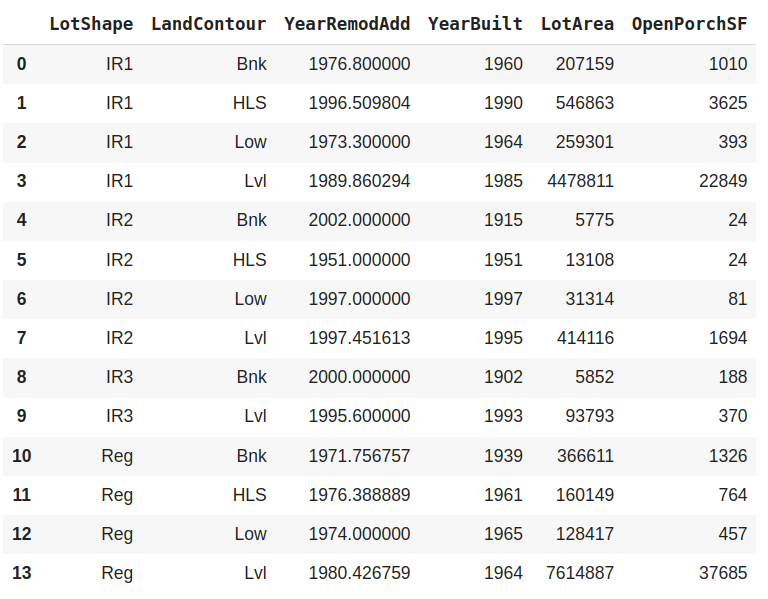

A continuación, viendo el agregado, podemos considerar que `LotShape` podría ser la columna categórica que se obtiene al verticalizar una tabla y que `LotArea` son los values de la tabla original.

Deshaz esa hipotética verticalización con `pivot`